In [2]:
import os
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import itertools
from collections import OrderedDict
from matplotlib.ticker import PercentFormatter

bdir = "/Users/english/code/kanpig_experiments/manuscript/results/ont_tables"
gt_data = pd.read_csv(os.path.join(bdir, "all.gt_dist.table.txt"), sep='\t')
inter_data = pd.read_csv(os.path.join(bdir, "all.intersect.table.txt"), sep='\t')
neigh_data = pd.read_csv(os.path.join(bdir, "all.neighbor.table.txt"), sep='\t')
svtype_data = pd.read_csv(os.path.join(bdir, "all.svtype.table.txt"), sep='\t')

tr_gt_data = pd.read_csv(os.path.join(bdir, "tr.gt_dist.table.txt"), sep='\t')
tr_inter_data = pd.read_csv(os.path.join(bdir, "tr.intersect.table.txt"), sep='\t')
tr_neigh_data = pd.read_csv(os.path.join(bdir, "tr.neighbor.table.txt"), sep='\t')
tr_svtype_data = pd.read_csv(os.path.join(bdir, "tr.svtype.table.txt"), sep='\t')

ntr_gt_data = pd.read_csv(os.path.join(bdir, "non_tr.gt_dist.table.txt"), sep='\t')
ntr_inter_data = pd.read_csv(os.path.join(bdir, "non_tr.intersect.table.txt"), sep='\t')
ntr_neigh_data = pd.read_csv(os.path.join(bdir, "non_tr.neighbor.table.txt"), sep='\t')
ntr_svtype_data = pd.read_csv(os.path.join(bdir, "non_tr.svtype.table.txt"), sep='\t')

In [3]:
def add_summary(data, with_as=False):
    """
    Add summary stats to a dataframe
    """
    e = "as_" if with_as else ""
    data['Total Calls'] = data[['Concordant', 'Discordant', 'Missing']].sum(axis=1)
    data['Total Genotyped'] = data['Total Calls'] - data['Missing']
    data['Missing Rate'] = data['Missing'] / data['Total Genotyped']
    data['GT Concordance'] = data['Concordant'] / data['Total Genotyped']
    data[f'{e}compP'] = data[f'{e}TP'] + data[f'{e}FP']
    data[f'{e}baseP'] = data[f'{e}TP'] + data[f'{e}FN']
    data[f'{e}compN'] = data[f'{e}TN'] + data[f'{e}FN']
    data[f'{e}baseN'] = data[f'{e}TN'] + data[f'{e}FP']
    data[f'{e}ppv'] = data[f'{e}TP'] / data[f'{e}compP']
    data[f'{e}tpr'] = data[f'{e}TP'] / data[f'{e}baseP']
    data[f'{e}tnr'] = data[f'{e}TN'] / data[f'{e}baseN']
    data[f'{e}npv'] = data[f'{e}TN'] / data[f'{e}compN']
    data[f'{e}acc'] = (data[f'{e}TP'] + data[f'{e}TN']) / (data[f'{e}baseP'] + data[f'{e}baseN'])
    data[f'{e}ba'] = (data[f'{e}tpr'] + data[f'{e}tnr']) / 2
    data[f'{e}f1'] = 2 * ((data[f'{e}ppv'] * data[f'{e}tpr']) / (data[f'{e}ppv'] + data[f'{e}tpr']))

In [4]:
add_summary(svtype_data)

In [13]:
sup_table['technology'].value_counts()

program
kanpig      36
svjedi      36
sniffles    36
cutesv      36
Name: count, dtype: int64

In [14]:
sup_table = svtype_data[svtype_data['svtype'] == 'TOT'].copy()
program_order = ['kanpig', 'svjedi', 'sniffles', 'cutesv']
coverage_order = ['32x', '16x', '8x']
tech_order = ['r10', 'r9']

# Convert each column to a categorical type with the specified order
sup_table['program'] = pd.Categorical(sup_table['program'], categories=program_order, ordered=True)
sup_table['coverage'] = pd.Categorical(sup_table['coverage'], categories=coverage_order, ordered=True)
sup_table['technology'] = pd.Categorical(sup_table['technology'], categories=tech_order, ordered=True)

In [21]:
view = sup_table.groupby(['program', 'coverage', 'technology'], observed=False)['GT Concordance'].mean().unstack()
view

technology              r10        r9
program  coverage                    
kanpig   32x       0.801657  0.778605
         16x       0.789464  0.767309
         8x        0.758819  0.738551
svjedi   32x       0.761107  0.769371
         16x       0.759531  0.767469
         8x        0.737515  0.745486
sniffles 32x       0.723642  0.708387
         16x       0.717392  0.705016
         8x        0.679413  0.676877
cutesv   32x       0.712196  0.703800
         16x       0.683868  0.678517
         8x        0.631022  0.630270

In [22]:
view['diff'] = view['r10'] - view['r9']
view

technology              r10        r9      diff
program  coverage                              
kanpig   32x       0.801657  0.778605  0.023052
         16x       0.789464  0.767309  0.022155
         8x        0.758819  0.738551  0.020268
svjedi   32x       0.761107  0.769371 -0.008265
         16x       0.759531  0.767469 -0.007939
         8x        0.737515  0.745486 -0.007971
sniffles 32x       0.723642  0.708387  0.015255
         16x       0.717392  0.705016  0.012376
         8x        0.679413  0.676877  0.002536
cutesv   32x       0.712196  0.703800  0.008396
         16x       0.683868  0.678517  0.005351
         8x        0.631022  0.630270  0.000751

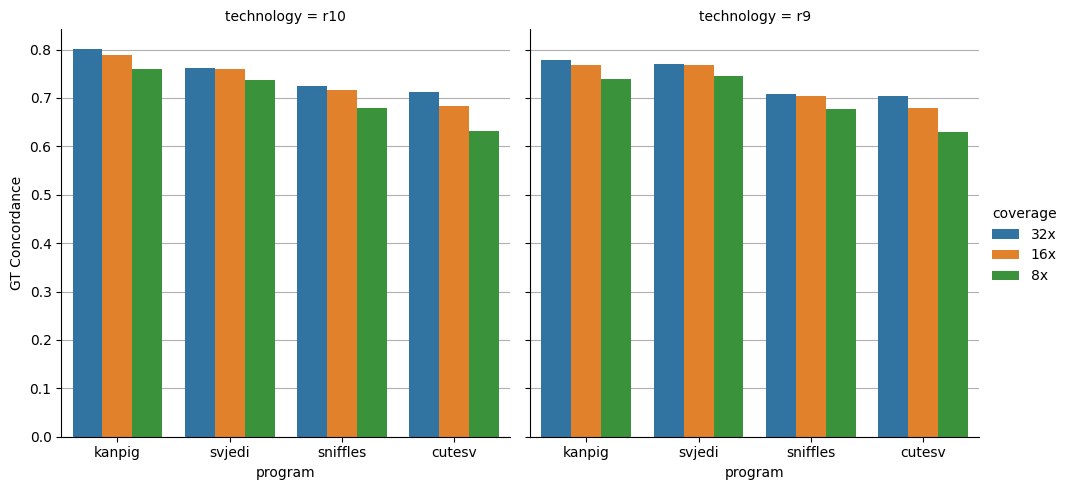

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

view = sup_table.groupby(['program', 'coverage', 'technology'], observed=False)['GT Concordance'].mean().reset_index()

g = sns.catplot(
    data=view,
    x='program',
    y='GT Concordance',
    hue='coverage',
    col='technology',
    kind='bar',
    dodge=True,
    zorder=2,
)
for ax in g.axes[0]:
    ax.grid(axis='y', zorder=1)


array([[<Axes: title={'center': 'technology = r10'}, xlabel='program', ylabel='GT Concordance'>,
        <Axes: title={'center': 'technology = r9'}, xlabel='program'>]],
      dtype=object)

In [18]:
consis = pd.read_csv("../consistency_report.txt", sep='\t')
for key in ['3x', 'pac_r10', 'pac_r9', 'r9_r10']:
    consis[f'{key}_pct'] = consis[key] / consis['count']
    consis[f'cor_{key}_pct'] = consis[f'cor_{key}'] / consis['count']
consis

,program,subset,count,pac_r9,pac_r10,r9_r10,3x,cor_pac_r9,cor_pac_r10,cor_r9_r10,cor_3x,3x_pct,cor_3x_pct,pac_r10_pct,cor_pac_r10_pct,pac_r9_pct,cor_pac_r9_pct,r9_r10_pct,cor_r9_r10_pct
0,kanpig,total,80316,62840,66667,63698,57462,51969,55391,50573,48266,0.715449,0.600951,0.830059,0.689663,0.782409,0.647057,0.793092,0.629675
1,kanpig,nomiss,77484,60260,64083,61038,54929,51969,55391,50531,48266,0.708908,0.622916,0.827048,0.714870,0.777709,0.670706,0.787750,0.652148
2,svjedi,total,80316,76086,77047,77124,75015,57511,57513,58542,57080,0.933998,0.710693,0.959298,0.716084,0.947333,0.716059,0.960257,0.728896
3,svjedi,nomiss,79020,75270,76345,76267,74443,57510,57513,58490,57080,0.942078,0.722349,0.966148,0.727828,0.952544,0.727790,0.965161,0.740192
4,sniffles,total,80316,68139,69896,70660,64699,46309,47799,46681,44492,0.805556,0.553962,0.870262,0.595137,0.848386,0.576585,0.879775,0.581217
5,sniffles,nomiss,79667,67832,69594,70249,64473,46303,47790,46635,44492,0.809281,0.558475,0.873561,0.599872,0.851444,0.581207,0.881783,0.585374
6,cutesv,total,80316,64963,65856,72782,62109,41615,42553,43888,39796,0.773308,0.495493,0.819961,0.529820,0.808843,0.518141,0.906196,0.546442
7,cutesv,nomiss,79956,64603,65496,72422,61749,41615,42553,43888,39796,0.772287,0.497724,0.819151,0.532205,0.807982,0.520474,0.905773,0.548902


In [19]:
consis[consis['subset'] == 'nomiss'][["program", '3x_pct', 'cor_3x_pct', 'cor_pac_r10_pct']]

,program,3x_pct,cor_3x_pct,cor_pac_r10_pct
1,kanpig,0.708908,0.622916,0.714870
3,svjedi,0.942078,0.722349,0.727828
5,sniffles,0.809281,0.558475,0.599872
7,cutesv,0.772287,0.497724,0.532205


In [20]:
consis.to_csv("SupTable.consistency.txt", sep='\t', index=False)

In [14]:
view = consis[consis['subset'] == 'nomiss']
print((view['pac_r10'] / view['count']))#.mean())
print((view['r9_r10'] / view['count']))#.mean())

print((view['cor_pac_r10'] / view['count']))#.mean())
print((view['cor_r9_r10'] / view['count']))#.mean())

1    0.827048
3    0.966148
5    0.873561
7    0.819151
dtype: float64
1    0.787750
3    0.965161
5    0.881783
7    0.905773
dtype: float64
1    0.714870
3    0.727828
5    0.599872
7    0.532205
dtype: float64
1    0.652148
3    0.740192
5    0.585374
7    0.548902
dtype: float64
